In [1]:
import pandas as pd

# Step 1: Import Data from Files

In [2]:
colName = ["user-id","item-id","rating","timestamp"]

In [3]:
u_data = pd.read_csv("u.data",sep='\t',header=None,names=colName)

In [4]:
u_data.head()

user-id  item-id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [5]:
colName = ["movie-id","movie-title","release-date","video-release-date",
          "IMDb-URL","unknown","Action","Adventure","Animation",
          "Childrens","Comedy","Crime","Documentary","Drama",
          "Fantasy","Film-Noir","Horror","Musical","Mystery",
          "Romance","Sci-Fi","Thriller","War","Western"]

In [6]:
u_item = pd.read_csv("u.item", sep="|", header=None, encoding="ISO-8859-1",names=colName)

In [7]:
u_item.head()

movie-id        movie-title release-date  video-release-date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb-URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Childrens  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1          1  ...        0          0       0        0   
1          1          0          0  ...        0          0       0        0   
2          0          0          0  ...        0          0       0        0   
3          0          0          0  ...        0          0       0        0   
4          0          0          0  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        0       0         1    0        0  
2        0        0       0         1    0        0  
3        0        0       0         0    0        0  
4        0        0       0         1    0        0  

[5 rows x 24 columns]

In [8]:
colName = ["user-id","age","gender","occupation","zip-code"]

In [9]:
u_user = pd.read_csv("u.user", sep="|", header=None, encoding="ISO-8859-1",names=colName)

In [10]:
u_user.head()

user-id  age gender  occupation zip-code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

# Step 2: Univariate Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%matplotlib inline

## Rating

/home/hp/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


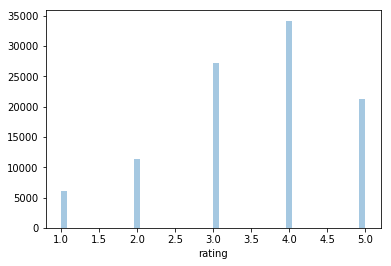

In [13]:
sns.distplot(u_data["rating"],kde=False)

## Age

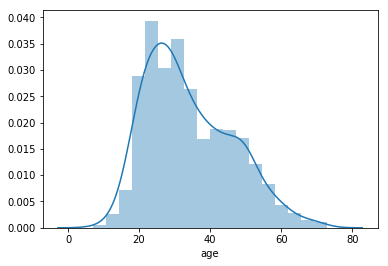

In [14]:
sns.distplot(u_user["age"])

In [15]:
u_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie-id              1682 non-null int64
movie-title           1682 non-null object
release-date          1681 non-null object
video-release-date    0 non-null float64
IMDb-URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Childrens             1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

In [16]:
#u_item.dropna(axis=0,inplace=True)
u_item.drop("video-release-date",axis=1,inplace=True)

In [17]:
u_item.dropna(axis=0,inplace=True)

## Release Date

In [18]:
u_item["release-date"]

0       01-Jan-1995
1       01-Jan-1995
2       01-Jan-1995
3       01-Jan-1995
4       01-Jan-1995
           ...     
1677    06-Feb-1998
1678    06-Feb-1998
1679    01-Jan-1998
1680    01-Jan-1994
1681    08-Mar-1996
Name: release-date, Length: 1679, dtype: object

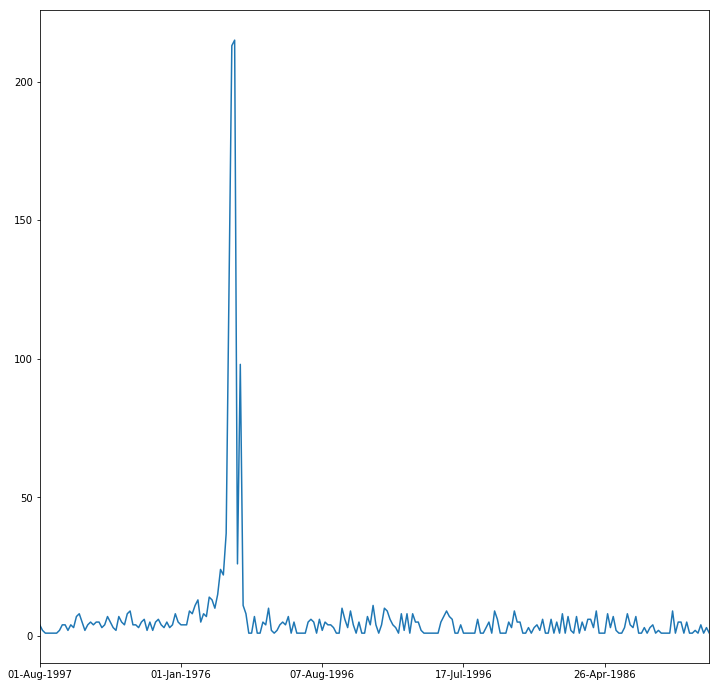

In [19]:
plt.figure(figsize=(12,12))
u_item["release-date"].value_counts().sort_index().plot.line()

In [20]:
u_item["release-date"] = pd.to_datetime(u_item["release-date"])

In [21]:
u_item["release-date"].head()

0   1995-01-01
1   1995-01-01
2   1995-01-01
3   1995-01-01
4   1995-01-01
Name: release-date, dtype: datetime64[ns]

## Release year, month and day

In [22]:
u_item["release-year"] = u_item["release-date"].dt.year
u_item["release-month"] = u_item["release-date"].dt.month
u_item["release-day"] = u_item["release-date"].dt.day

/home/hp/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


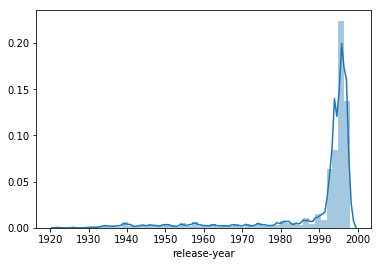

In [23]:
sns.distplot(u_item["release-year"])

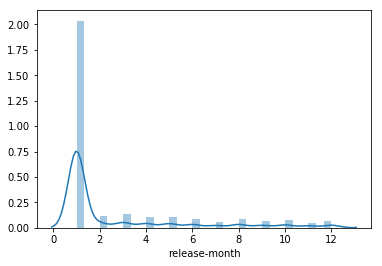

In [24]:
sns.distplot(u_item["release-month"])

In [25]:
u_item["release-day"].head()

0    1
1    1
2    1
3    1
4    1
Name: release-day, dtype: int64

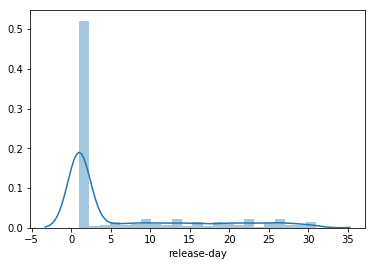

In [26]:
sns.distplot(u_item["release-day"])

## Gender

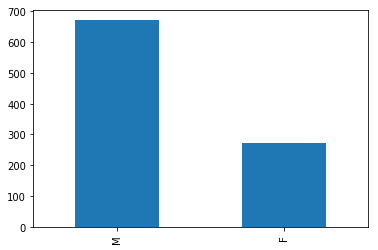

In [27]:
u_user.gender.value_counts().plot.bar()

In [28]:
u_user["gender"].head()

0    M
1    F
2    M
3    M
4    F
Name: gender, dtype: object

In [29]:
def replaceGenderWithNumerical(data):
    if data == "M":
        return 0
    elif data == "F":
        return 1

In [30]:
u_user["gender-numerical"] = u_user["gender"].apply(replaceGenderWithNumerical)

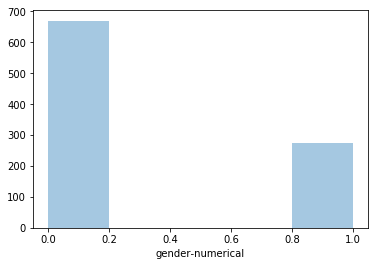

In [31]:
sns.distplot(u_user["gender-numerical"],kde=False)

## Occupation

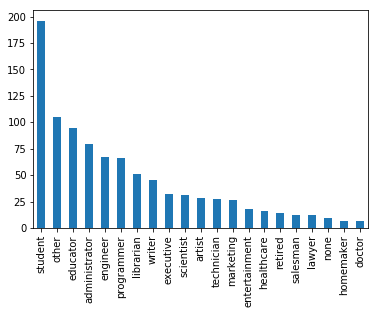

In [32]:
u_user.occupation.value_counts().plot.bar()

# Step 3: Popularity of genres

In [33]:
u_item.head()

movie-id        movie-title release-date  \
0         1   Toy Story (1995)   1995-01-01   
1         2   GoldenEye (1995)   1995-01-01   
2         3  Four Rooms (1995)   1995-01-01   
3         4  Get Shorty (1995)   1995-01-01   
4         5     Copycat (1995)   1995-01-01   

                                            IMDb-URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Childrens  Comedy  ...  Musical  Mystery  Romance  \
0          0          1          1       1  ...        0        0        0   
1          1          0          0       0  ...        0        0        0   
2          0          0          0       0  ...        0        0        0   
3          0          0          0       1  ...        0        0        0   
4          0          0          0       0  ...        0        0        0   

   Sci-Fi  Thriller  War  Western  release-year  release-month  release-day  
0       0         0    0        0          1995              1            1  
1       0         1    0        0          1995              1            1  
2       0         1    0        0          1995              1            1  
3       0         0    0        0          1995              1            1  
4       0         1    0        0          1995              1            1  

[5 rows x 26 columns]

In [34]:
genreData = u_item.copy()

In [35]:
genreData.drop(["movie-id","movie-title","IMDb-URL","release-date","release-month","release-day"],axis=1,inplace=True)

In [36]:
genreData.set_index('release-year',inplace=True)

In [37]:
genreData.head()

unknown  Action  Adventure  Animation  Childrens  Comedy  Crime  \
release-year                                                                    
1995                0       0          0          1          1       1      0   
1995                0       1          1          0          0       0      0   
1995                0       0          0          0          0       0      0   
1995                0       1          0          0          0       1      0   
1995                0       0          0          0          0       0      1   

              Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  \
release-year                                                            
1995                    0      0        0          0       0        0   
1995                    0      0        0          0       0        0   
1995                    0      0        0          0       0        0   
1995                    0      1        0          0       0        0   
1995                    0      1        0          0       0        0   

              Mystery  Romance  Sci-Fi  Thriller  War  Western  
release-year                                                    
1995                0        0       0         0    0        0  
1995                0        0       0         1    0        0  
1995                0        0       0         1    0        0  
1995                0        0       0         0    0        0  
1995                0        0       0         1    0        0

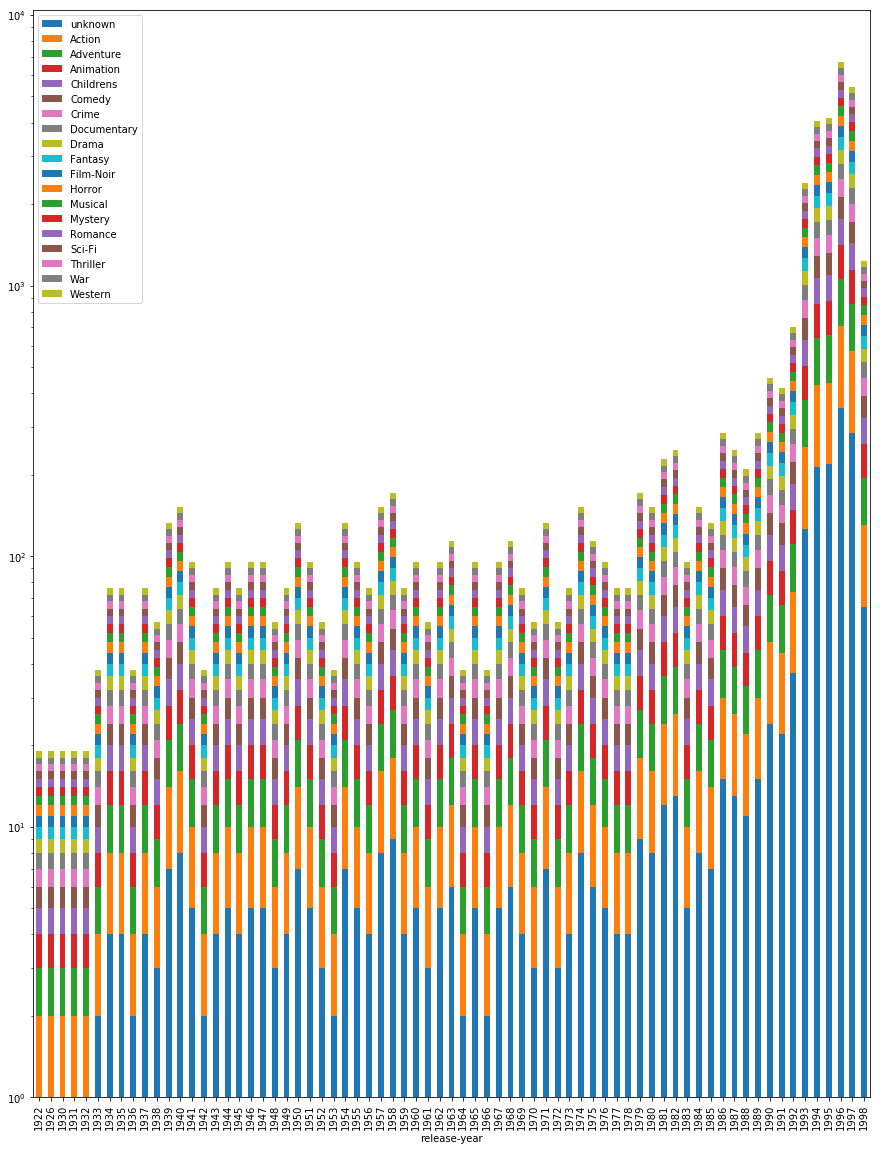

In [38]:
fig,ax = plt.subplots()
genreData.groupby("release-year").count().plot.bar(stacked=True,figsize=(15, 20),ax=ax)
ax.set_yscale('log')
fig.savefig("genrePlot.png")

# Step 4: Top 25 movies based on average-rating

In [39]:
u_user.head()

user-id  age gender  occupation zip-code  gender-numerical
0        1   24      M  technician    85711                 0
1        2   53      F       other    94043                 1
2        3   23      M      writer    32067                 0
3        4   24      M  technician    43537                 0
4        5   33      F       other    15213                 1

In [40]:
u_data.head()

user-id  item-id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [41]:
u_item.head()

movie-id        movie-title release-date  \
0         1   Toy Story (1995)   1995-01-01   
1         2   GoldenEye (1995)   1995-01-01   
2         3  Four Rooms (1995)   1995-01-01   
3         4  Get Shorty (1995)   1995-01-01   
4         5     Copycat (1995)   1995-01-01   

                                            IMDb-URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Childrens  Comedy  ...  Musical  Mystery  Romance  \
0          0          1          1       1  ...        0        0        0   
1          1          0          0       0  ...        0        0        0   
2          0          0          0       0  ...        0        0        0   
3          0          0          0       1  ...        0        0        0   
4          0          0          0       0  ...        0        0        0   

   Sci-Fi  Thriller  War  Western  release-year  release-month  release-day  
0       0         0    0        0          1995              1            1  
1       0         1    0        0          1995              1            1  
2       0         1    0        0          1995              1            1  
3       0         0    0        0          1995              1            1  
4       0         1    0        0          1995              1            1  

[5 rows x 26 columns]

In [42]:
# Merge on the basis of movie-id and item-id
u_item_data = u_data.copy()

In [43]:
u_item_data = u_item_data.merge(u_item, left_on="item-id", right_on="movie-id")

In [44]:
u_item_data.head()

user-id  item-id  rating  timestamp  movie-id   movie-title release-date  \
0      196      242       3  881250949       242  Kolya (1996)   1997-01-24   
1       63      242       3  875747190       242  Kolya (1996)   1997-01-24   
2      226      242       5  883888671       242  Kolya (1996)   1997-01-24   
3      154      242       3  879138235       242  Kolya (1996)   1997-01-24   
4      306      242       5  876503793       242  Kolya (1996)   1997-01-24   

                                          IMDb-URL  unknown  Action  ...  \
0  http://us.imdb.com/M/title-exact?Kolya%20(1996)        0       0  ...   
1  http://us.imdb.com/M/title-exact?Kolya%20(1996)        0       0  ...   
2  http://us.imdb.com/M/title-exact?Kolya%20(1996)        0       0  ...   
3  http://us.imdb.com/M/title-exact?Kolya%20(1996)        0       0  ...   
4  http://us.imdb.com/M/title-exact?Kolya%20(1996)        0       0  ...   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  release-year  \
0        0        0        0       0         0    0        0          1997   
1        0        0        0       0         0    0        0          1997   
2        0        0        0       0         0    0        0          1997   
3        0        0        0       0         0    0        0          1997   
4        0        0        0       0         0    0        0          1997   

   release-month  release-day  
0              1           24  
1              1           24  
2              1           24  
3              1           24  
4              1           24  

[5 rows x 30 columns]

In [45]:
colsToRemove = list(u_item_data.columns.values)

In [46]:
colsToRemove.remove("movie-id")
colsToRemove.remove("movie-title")
colsToRemove.remove("rating")

In [47]:
u_item_data.drop(colsToRemove,axis=1,inplace=True)

In [48]:
u_item_data.head()

rating  movie-id   movie-title
0       3       242  Kolya (1996)
1       3       242  Kolya (1996)
2       5       242  Kolya (1996)
3       3       242  Kolya (1996)
4       5       242  Kolya (1996)

In [49]:
u_item_data.dropna(axis=0,inplace=True)

In [50]:
above100Ratings = u_item_data.groupby("movie-id").sum()>100

In [51]:
above100Ratings = above100Ratings[above100Ratings["rating"]==True]

In [52]:
above100Ratings.head(10)

rating
movie-id        
1           True
2           True
3           True
4           True
5           True
7           True
8           True
9           True
10          True
11          True

In [53]:
movieid_shortlisted = above100Ratings.index.values

In [54]:
movieid_shortlisted[5]

7

In [55]:
def checkIfInList(value):
    if value in movieid_shortlisted:
        return True
    else:
        return False

In [56]:
u_item_data.head()

rating  movie-id   movie-title
0       3       242  Kolya (1996)
1       3       242  Kolya (1996)
2       5       242  Kolya (1996)
3       3       242  Kolya (1996)
4       5       242  Kolya (1996)

In [57]:
u_item_data["100+"] = u_item_data["movie-id"].apply(checkIfInList)

In [58]:
u_item_data.head(20)

rating  movie-id   movie-title  100+
0        3       242  Kolya (1996)  True
1        3       242  Kolya (1996)  True
2        5       242  Kolya (1996)  True
3        3       242  Kolya (1996)  True
4        5       242  Kolya (1996)  True
5        4       242  Kolya (1996)  True
6        5       242  Kolya (1996)  True
7        4       242  Kolya (1996)  True
8        4       242  Kolya (1996)  True
9        4       242  Kolya (1996)  True
10       2       242  Kolya (1996)  True
11       5       242  Kolya (1996)  True
12       5       242  Kolya (1996)  True
13       2       242  Kolya (1996)  True
14       5       242  Kolya (1996)  True
15       5       242  Kolya (1996)  True
16       4       242  Kolya (1996)  True
17       4       242  Kolya (1996)  True
18       4       242  Kolya (1996)  True
19       4       242  Kolya (1996)  True

In [59]:
u_item_data = u_item_data[u_item_data["100+"]==True]

In [60]:
u_item_data.drop("100+",axis=1,inplace=True)

In [61]:
sortedRating = u_item_data.groupby("movie-id").mean().sort_values(by="rating",ascending=False)

In [62]:
sortedRating.head()

rating
movie-id          
408       4.491071
318       4.466443
169       4.466102
483       4.456790
114       4.447761

In [63]:
sortedRating = sortedRating.merge(u_item_data,left_on="movie-id",right_on="movie-id")

In [64]:
sortedRating.head()

movie-id  rating_x  rating_y            movie-title
0       408  4.491071         5  Close Shave, A (1995)
1       408  4.491071         5  Close Shave, A (1995)
2       408  4.491071         1  Close Shave, A (1995)
3       408  4.491071         4  Close Shave, A (1995)
4       408  4.491071         4  Close Shave, A (1995)

In [65]:
sortedRating.drop(["rating_y","movie-id"],axis=1,inplace=True)

In [66]:
sortedRating["rating"] = sortedRating["rating_x"]

In [67]:
sortedRating.drop("rating_x",axis=1,inplace=True)

In [68]:
sortedRating.head(25)

movie-title    rating
0   Close Shave, A (1995)  4.491071
1   Close Shave, A (1995)  4.491071
2   Close Shave, A (1995)  4.491071
3   Close Shave, A (1995)  4.491071
4   Close Shave, A (1995)  4.491071
5   Close Shave, A (1995)  4.491071
6   Close Shave, A (1995)  4.491071
7   Close Shave, A (1995)  4.491071
8   Close Shave, A (1995)  4.491071
9   Close Shave, A (1995)  4.491071
10  Close Shave, A (1995)  4.491071
11  Close Shave, A (1995)  4.491071
12  Close Shave, A (1995)  4.491071
13  Close Shave, A (1995)  4.491071
14  Close Shave, A (1995)  4.491071
15  Close Shave, A (1995)  4.491071
16  Close Shave, A (1995)  4.491071
17  Close Shave, A (1995)  4.491071
18  Close Shave, A (1995)  4.491071
19  Close Shave, A (1995)  4.491071
20  Close Shave, A (1995)  4.491071
21  Close Shave, A (1995)  4.491071
22  Close Shave, A (1995)  4.491071
23  Close Shave, A (1995)  4.491071
24  Close Shave, A (1995)  4.491071

In [69]:
sortedRating.drop_duplicates(inplace=True)

In [70]:
sortedRating.sort_values(by="rating",ascending=False,inplace=True)

In [71]:
sortedRating.head(25)

movie-title    rating
0                                 Close Shave, A (1995)  4.491071
112                             Schindler's List (1993)  4.466443
410                          Wrong Trousers, The (1993)  4.466102
528                                   Casablanca (1942)  4.456790
771   Wallace & Gromit: The Best of Aardman Animatio...  4.447761
838                    Shawshank Redemption, The (1994)  4.445230
1121                                 Rear Window (1954)  4.387560
1330                         Usual Suspects, The (1995)  4.385768
1597                                   Star Wars (1977)  4.358491
2180                                12 Angry Men (1957)  4.344000
2305                              Third Man, The (1949)  4.333333
2377                                Citizen Kane (1941)  4.292929
2575            Some Folks Call It a Sling Blade (1993)  4.292683
2616                       To Kill a Mockingbird (1962)  4.292237
2835             One Flew Over the Cuckoo's Nest (1975)  4.291667
3099                   Silence of the Lambs, The (1991)  4.289744
3489                          North by Northwest (1959)  4.284916
3668                              Godfather, The (1972)  4.283293
4081                              Secrets & Lies (1996)  4.265432
4243                           Good Will Hunting (1997)  4.262626
4441                             Shall We Dance? (1996)  4.260870
4487                   Manchurian Candidate, The (1962)  4.259542
4618  Dr. Strangelove or: How I Learned to Stop Worr...  4.252577
4812                     Raiders of the Lost Ark (1981)  4.252381
5232                                     Vertigo (1958)  4.251397

# Step 5 (a): Men watch more drama than women

In [72]:
u_user.head()

user-id  age gender  occupation zip-code  gender-numerical
0        1   24      M  technician    85711                 0
1        2   53      F       other    94043                 1
2        3   23      M      writer    32067                 0
3        4   24      M  technician    43537                 0
4        5   33      F       other    15213                 1

In [73]:
u_item.head()

movie-id        movie-title release-date  \
0         1   Toy Story (1995)   1995-01-01   
1         2   GoldenEye (1995)   1995-01-01   
2         3  Four Rooms (1995)   1995-01-01   
3         4  Get Shorty (1995)   1995-01-01   
4         5     Copycat (1995)   1995-01-01   

                                            IMDb-URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Childrens  Comedy  ...  Musical  Mystery  Romance  \
0          0          1          1       1  ...        0        0        0   
1          1          0          0       0  ...        0        0        0   
2          0          0          0       0  ...        0        0        0   
3          0          0          0       1  ...        0        0        0   
4          0          0          0       0  ...        0        0        0   

   Sci-Fi  Thriller  War  Western  release-year  release-month  release-day  
0       0         0    0        0          1995              1            1  
1       0         1    0        0          1995              1            1  
2       0         1    0        0          1995              1            1  
3       0         0    0        0          1995              1            1  
4       0         1    0        0          1995              1            1  

[5 rows x 26 columns]

In [74]:
u_data.head()

user-id  item-id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [75]:
genderDrama = u_item[["movie-id","Drama"]]

In [76]:
genderDrama.head()

movie-id  Drama
0         1      0
1         2      0
2         3      0
3         4      1
4         5      1

In [77]:
genderDrama = genderDrama[genderDrama["Drama"]==1]

In [78]:
genderDrama.head()

movie-id  Drama
3         4      1
4         5      1
5         6      1
6         7      1
7         8      1

In [79]:
genderDrama.drop("Drama",axis=1,inplace=True)

In [80]:
genderDrama.head()

movie-id
3         4
4         5
5         6
6         7
7         8

In [81]:
genderDrama = genderDrama.merge(u_data,how="inner",left_on="movie-id",right_on="item-id")[["movie-id","user-id"]]

In [82]:
genderDrama.head()

movie-id  user-id
0         4       99
1         4       19
2         4      194
3         4      207
4         4       62

In [83]:
genderDrama.drop("movie-id",inplace=True,axis=1)

In [84]:
genderDrama.drop_duplicates(inplace=True)

In [85]:
tmp = genderDrama.merge(u_user[["user-id","gender"]],left_on="user-id",right_on="user-id")

In [86]:
tmp.head()

user-id gender
0       99      M
1       19      M
2      194      M
3      207      M
4       62      F

In [87]:
tmp.groupby("gender").count()

user-id
gender         
F           273
M           670

This statement can be verified from above.

# Step 5 (b): Men watch more Romance than women

In [88]:
genderRomance = u_item[["movie-id","Romance"]]

In [89]:
genderRomance = genderRomance[genderRomance["Romance"]==1]

In [90]:
genderRomance.drop("Romance",axis=1,inplace=True)

In [91]:
genderRomance = genderRomance.merge(u_data,how="inner",left_on="movie-id",right_on="item-id")[["movie-id","user-id"]]

In [92]:
genderRomance.drop("movie-id",inplace=True,axis=1)
genderRomance.drop_duplicates(inplace=True)

In [93]:
tmp = genderRomance.merge(u_user[["user-id","gender"]],left_on="user-id",right_on="user-id")

In [94]:
tmp.groupby("gender").count()

user-id
gender         
F           273
M           670

This statement can be verified from above.

# Step 5 (c): Women watch more Sci-Fi than men

In [103]:
genderSciFi = u_item[["movie-id","Sci-Fi"]]

In [104]:
genderSciFi = genderSciFi[genderSciFi["Sci-Fi"]==1]

In [105]:
genderSciFi.drop("Sci-Fi",axis=1,inplace=True)

In [106]:
genderSciFi

movie-id
6            7
37          38
38          39
49          50
61          62
...        ...
1410      1411
1415      1416
1418      1419
1471      1472
1595      1596

[101 rows x 1 columns]

In [107]:
genderSciFi = genderSciFi.merge(u_data,how="inner",left_on="movie-id",right_on="item-id")[["movie-id","user-id"]]

In [109]:
genderSciFi

movie-id  user-id
0             7      250
1             7       10
2             7       66
3             7      291
4             7      198
...         ...      ...
12725      1419      600
12726      1419      393
12727      1472      257
12728      1472      523
12729      1596      425

[12730 rows x 2 columns]

In [110]:
genderSciFi.drop("movie-id",inplace=True,axis=1)

In [111]:
genderSciFi

user-id
0          250
1           10
2           66
3          291
4          198
...        ...
12725      600
12726      393
12727      257
12728      523
12729      425

[12730 rows x 1 columns]

In [112]:
genderSciFi.drop_duplicates(inplace=True)

In [113]:
genderSciFi

user-id
0         250
1          10
2          66
3         291
4         198
...       ...
9839      431
9843      531
9880      812
9893      319
9920      635

[908 rows x 1 columns]

In [100]:
tmp = genderSciFi.merge(u_user[["user-id","gender"]],left_on="user-id",right_on="user-id")

In [101]:
tmp.gender.value_counts()

M    652
F    256
Name: gender, dtype: int64

In [102]:
tmp.groupby("gender").count()

user-id
gender         
F           256
M           652